# Sanity Checks Benchexec
This notebook is to check the sanity of the data (e.g., is there a deviation from two runs of the same tool)

In [2]:
import pandas as pd
import seaborn as sns
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
root_path = "~/Work/Data/app"

def get_df(csv_file):
    df = pd.read_csv(os.path.join(root_path, csv_file))
    df.set_index("id", inplace=True)
    #TODO split id into domains
    return df

In [4]:
local_file = "repeats_ram/results.csv"
network_file = "repeats_network/results.csv"

df_1 = pd.read_csv(os.path.join(root_path, local_file))
df_2 = pd.read_csv(os.path.join(root_path, network_file))
df_1.head()

,parallel,time,policy
0,16,8.510404,572
1,16,8.429824,572
2,16,8.545882,572
3,16,8.436511,572
4,16,8.464482,572


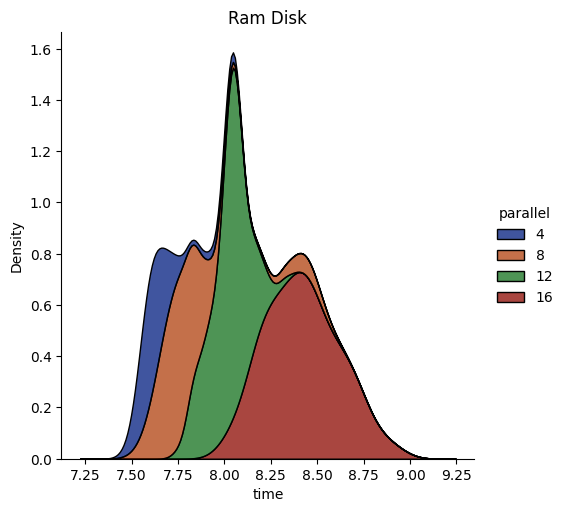

In [10]:
sns.displot(df_1.query("parallel<=16"), x="time", hue="parallel", kind="kde", multiple="stack", fill=True, palette="dark")
plt.title("Ram Disk");

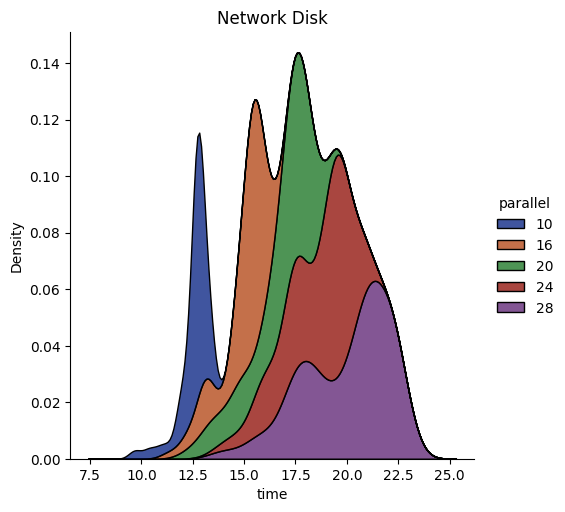

In [83]:
sns.displot(df_2, x="time", hue="parallel", kind="kde", multiple="stack", fill=True, palette="dark")
plt.title("Network Disk");

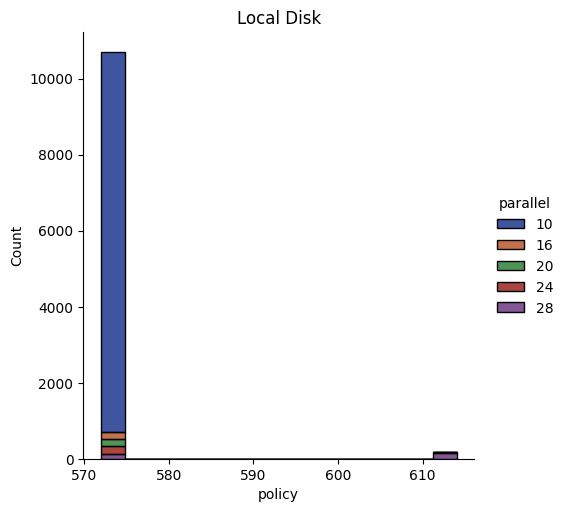

In [97]:
sns.displot(df_1, x="policy", hue="parallel", multiple="stack", fill=True, palette="dark")
plt.title("Local Disk");

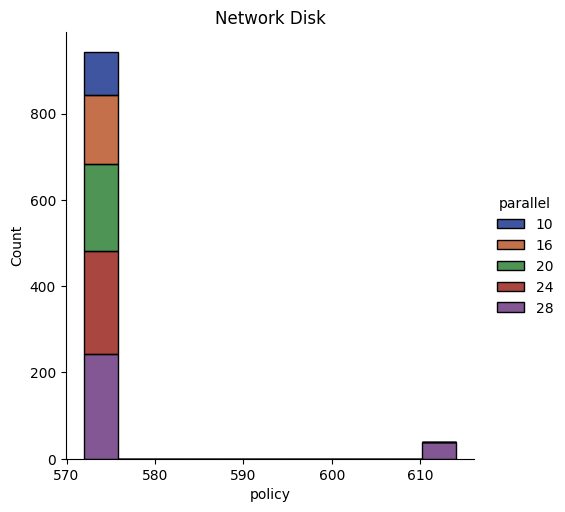

In [88]:
sns.displot(df_2, x="policy", hue="parallel",  multiple="stack", fill=True, palette="dark")
plt.title("Network Disk");

## Replication
Check if two runs of the same solver yield similar results

In [49]:
prp_1_file = "output_28/2024_03_01_03_14_27/results.csv"
prp_2_file = "output_10/2024_03_06_07_46_55/results.csv"

lpg_1_file = "output/2024_03_05_06_43_15/results.csv"
lpg_2_file = "output/2024_03_05_18_20_23/results.csv"

df_1 = get_df(prp_1_file)
df_2 = get_df(prp_2_file)

df = df_1.merge(df_2, how="inner", right_index = True, left_index = True)
df["time_diff"] = df["solve_time_x"] - df["solve_time_y"]
# df = df.fillna(-1)

In [50]:
df.query("policy_size_x != policy_size_y").sort_values("solve_time_x")

,solver_x,memory_x,memory_exceeded_x,translation_time_x,solve_time_x,policy_size_x,solved_x,solver_y,memory_y,memory_exceeded_y,translation_time_y,solve_time_y,policy_size_y,solved_y,time_diff
id,,,,,,,,,,,,,,,
ZenoTravel_RND50_5,prp,140.410156,False,0.337504,1799.009437,-1,0,prp,143.628906,False,0.246121,1259.715146,35301,1,539.294291
Elevators_SCC56_6,prp,133.203125,False,0.369558,1799.009578,-1,0,prp,136.285156,False,0.283759,1127.283079,32084,1,671.726499
ZenoTravel_RND50_10,prp,153.429688,False,0.355111,1799.009966,-1,0,prp,160.894531,False,0.278083,1436.253284,44722,1,362.756682
Storage_SCC56_13,prp,-1.000000,-1,0.367738,1799.011078,-1,0,prp,189.328125,False,0.282483,1415.060668,22126,1,383.950411
ZenoTravel_SCC2-20_16,prp,476.695312,False,0.347050,1799.011895,-1,0,prp,499.941406,False,0.274034,702.925904,54036,1,1096.085991
BlocksWorld_SCC56_16,prp,-1.000000,-1,0.441087,1799.011905,-1,0,prp,315.218750,False,0.281231,1131.991450,50039,1,667.020455
BlocksWorld_SCC56_13,prp,266.199219,False,0.281842,1799.012002,-1,0,prp,296.593750,False,0.265871,1483.266769,50511,1,315.745234
ZenoTravel_SCC2-20_17,prp,443.660156,False,0.354538,1799.016150,-1,0,prp,463.156250,False,0.296659,839.995293,50976,1,959.020857
Elevators_RND50_12,prp,183.824219,False,0.417724,1799.018969,-1,0,prp,186.746094,False,0.290862,1101.286338,42866,1,697.732632


In [51]:
df.head()

,solver_x,memory_x,memory_exceeded_x,translation_time_x,solve_time_x,policy_size_x,solved_x,solver_y,memory_y,memory_exceeded_y,translation_time_y,solve_time_y,policy_size_y,solved_y,time_diff
id,,,,,,,,,,,,,,,
Barman_RING50_1,prp,263.00,False,0.434406,46.480849,773,1,prp,264.00,False,0.268601,26.375019,773,1,20.105830
Barman_RING50_2,prp,263.25,False,0.459993,40.998496,669,1,prp,264.00,False,0.263566,27.227617,669,1,13.770878
Barman_RING50_3,prp,262.75,False,0.451506,45.876008,788,1,prp,263.50,False,0.268888,27.377782,788,1,18.498226
Barman_RING50_4,prp,262.75,False,0.398617,38.608583,675,1,prp,264.00,False,0.261513,27.095418,675,1,11.513165
Barman_RING50_5,prp,263.25,False,0.267246,36.187335,935,1,prp,264.25,False,0.263807,27.414941,935,1,8.772394


In [52]:
df.query("policy_size_x != policy_size_y and solved_x == solved_y and solved_x == 1").sort_values("solve_time_y")

,solver_x,memory_x,memory_exceeded_x,translation_time_x,solve_time_x,policy_size_x,solved_x,solver_y,memory_y,memory_exceeded_y,translation_time_y,solve_time_y,policy_size_y,solved_y,time_diff
id,,,,,,,,,,,,,,,


In [53]:
df.query("solved_x == solved_y and solved_x == 1 and abs(time_diff)>100").sort_values("time_diff")

,solver_x,memory_x,memory_exceeded_x,translation_time_x,solve_time_x,policy_size_x,solved_x,solver_y,memory_y,memory_exceeded_y,translation_time_y,solve_time_y,policy_size_y,solved_y,time_diff
id,,,,,,,,,,,,,,,
PipesWorld_EIGHT50_15,prp,185.000000,False,0.395290,304.447261,15477,1,prp,185.250000,False,0.341076,203.114230,15477,1,101.333031
Storage_SCC56_11,prp,109.000000,False,0.315653,266.499667,9152,1,prp,109.250000,False,0.291865,159.250119,9152,1,107.249549
Barman_SCC56_10,prp,138.000000,False,0.390064,383.476574,24995,1,prp,138.000000,False,0.268405,274.971217,24995,1,108.505357
BlocksWorld_SCC56_7,prp,115.750000,False,0.350498,320.559335,18450,1,prp,117.250000,False,0.271490,211.925541,18450,1,108.633794
PipesWorld_EIGHT50_11,prp,250.250000,False,0.424393,274.353229,13808,1,prp,155.250000,False,0.347150,158.745867,13808,1,115.607363
ZenoTravel_RND50_17,prp,103.000000,False,0.254075,363.782239,21021,1,prp,103.500000,False,0.246254,243.477032,21021,1,120.305207
ZenoTravel_SCC56_1,prp,84.750000,False,0.357162,321.151521,11967,1,prp,85.500000,False,0.270152,192.500411,11967,1,128.651110
Elevators_RND50_6,prp,94.250000,False,0.385669,249.751514,14722,1,prp,106.500000,False,0.266525,120.774815,14722,1,128.976700
Barman_SCC56_9,prp,137.250000,False,0.396526,452.281758,24326,1,prp,138.000000,False,0.268131,322.803052,24326,1,129.478706


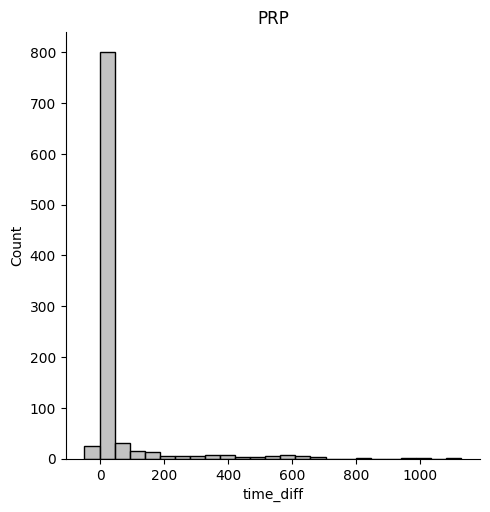

In [54]:
sns.displot(df, x="time_diff", bins=25, color="#aeaeae")
plt.title("PRP");

Text(0.5, 1.0, 'PRP')

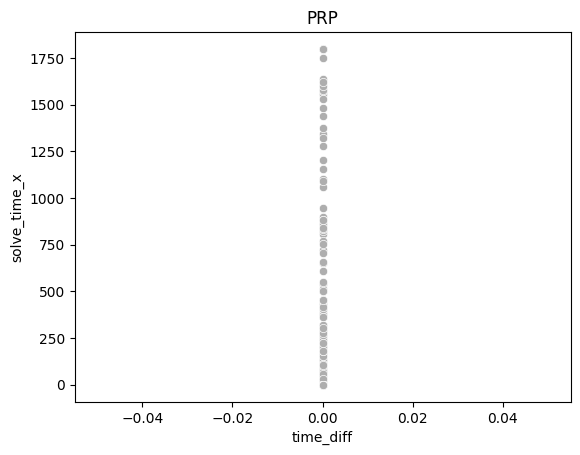

In [25]:
sns.scatterplot(df, y="solve_time_x", x="time_diff", color="#aeaeae")
plt.title("PRP")

## Files
There are 5 runs of the benchmarks.
1. LPG on AIJ and IJCAI tasks
2. PRP and PRP2 with no invariant analysis on the AIJ, IJCAI, FOND tasks
3. PRP and PRP2 with 300s invariant time limit on the AIJ, IJCAI, and FOND tasks

Please note that the FOND task for PRP was run separately due to space constraints on the drive.

In [124]:
root_path = os.path.expanduser("~/Work/Data/app")
lpg_file = "results_lpg/benchmark-lpg.2024-02-08_15-14-34.results.lpg.csv"
prp_0_file = "results_prp_inv0/benchmark-fond-prp.2024-02-09_08-04-31.results.prp.csv"
prp_0_fond_file = "results_prp_inv0_fond/benchmark-fond-prp.2024-02-09_14-01-15.results.prp.FOND.csv"
prp_300_file = "results_prp_inv300/benchmark-fond-prp.2024-02-10_10-43-22.results.prp.csv"
prp_300_2_file = "results/benchmark-fond-prp.2024-02-20_03-16-52.results.prp.csv"
prp_300_3_file = "results/benchmark-fond-prp.2024-02-20_22-17-55.results.prp.csv"
prp2_0_file = "results_prp2_inv0/benchmark-fond-prp2.2024-02-08_17-34-27.results.prp2.csv"
prp2_300_file = "results_prp2_inv300/benchmark-fond-prp2.2024-02-09_16-32-51.results.prp2.csv"

all_files = [lpg_file, prp_0_file, prp_0_fond_file, prp_300_file, prp2_0_file, prp2_300_file]

rename_columns = {"benchmarks/benchexe/tasks/": "id", "cputime (s)": "cputime", "walltime (s)": "walltime", "memory (MB)": "memory_mb"}


## Status and policy size
The policy size should be -1 for an unsolved instance.

In [77]:
for f in all_files:
    df = get_df(f)
    assert df.query("policy_size==-1 and status==True").size == 0

## Time and status
Check for timeouts

In [79]:
for f in all_files:
    df = get_df(f)
    print(f"Processing file {f}")
    max_time =  df["cputime"].max()
    max_solved_time = df.query("status==True")["cputime"].max()
    print(f"max time: {max_time}")
    print(f"max solved time: {max_solved_time}")
    assert df.query("cputime > @max_solved_time and status==True").size == 0

Processing file results_lpg/benchmark-lpg.2024-02-08_15-14-34.results.lpg.csv
max time: 1853.09621
max solved time: 1705.813515
Processing file results_prp_inv0/benchmark-fond-prp.2024-02-09_08-04-31.results.prp.csv
max time: 3599.736535
max solved time: 3253.660824
Processing file results_prp_inv0_fond/benchmark-fond-prp.2024-02-09_14-01-15.results.prp.FOND.csv
max time: 3599.50056
max solved time: 2061.393008
Processing file results_prp_inv300/benchmark-fond-prp.2024-02-10_10-43-22.results.prp.csv
max time: 3599.65492
max solved time: 3186.548063
Processing file results_prp2_inv0/benchmark-fond-prp2.2024-02-08_17-34-27.results.prp2.csv
max time: 3599.782956
max solved time: 3582.889765
Processing file results_prp2_inv300/benchmark-fond-prp2.2024-02-09_16-32-51.results.prp2.csv
max time: 3599.767144
max solved time: 3451.257514


## Memory and status
Check for exceeding memory limit

In [82]:
for f in all_files:
    df = get_df(f)
    print(f"Processing file {f}")
    max_memory =  df["memory_mb"].max()
    max_solved_memory = df.query("status==True")["memory_mb"].max()
    print(f"max memory: {max_memory}")
    print(f"max solved memory: {max_solved_memory}")
    assert df.query("memory_mb > @max_solved_memory and status==True").size == 0

Processing file results_lpg/benchmark-lpg.2024-02-08_15-14-34.results.lpg.csv
max memory: 1339.531264
max solved memory: 1005.969408
Processing file results_prp_inv0/benchmark-fond-prp.2024-02-09_08-04-31.results.prp.csv
max memory: 2048.0
max solved memory: 2046.337024
Processing file results_prp_inv0_fond/benchmark-fond-prp.2024-02-09_14-01-15.results.prp.FOND.csv
max memory: 2048.0
max solved memory: 1985.327104
Processing file results_prp_inv300/benchmark-fond-prp.2024-02-10_10-43-22.results.prp.csv
max memory: 2048.0
max solved memory: 1966.067712
Processing file results_prp2_inv0/benchmark-fond-prp2.2024-02-08_17-34-27.results.prp2.csv
max memory: 2048.0
max solved memory: 986.001408
Processing file results_prp2_inv300/benchmark-fond-prp2.2024-02-09_16-32-51.results.prp2.csv
max memory: 2048.0
max solved memory: 920.71936


## LPG Solver
LPG solver has a maximum time of 1853s. Needs investigating as the maximum time limit was 3600

In [85]:
df = get_df(lpg_file)
df.query(f"status==False")

,status,cputime,walltime,memory_mb,policy_size,solve_time,translation_time
id,,,,,,,
AIJ_Barman_EIGHT50_20.yml,False,1800.604284,1801.793812,552.935424,-1.0,1800.878216,0.264323
AIJ_Barman_RND50_11.yml,False,834.097448,834.456957,396.005376,-1.0,833.513425,0.396414
AIJ_Barman_RND50_12.yml,False,1082.150081,1082.738644,434.806784,-1.0,1081.980065,0.278016
AIJ_Barman_RND50_13.yml,False,1019.853906,1022.053233,419.217408,-1.0,1021.269161,0.293084
AIJ_Barman_RND50_14.yml,False,1800.697530,1801.812109,474.169344,-1.0,1800.760114,0.392002
...,...,...,...,...,...,...,...
IJCAI_Woodworking_14.yml,False,791.634939,791.994368,463.835136,-1.0,791.155072,0.292552
IJCAI_Woodworking_15.yml,False,1804.487993,1804.983364,556.933120,-1.0,1804.091180,0.320622
IJCAI_Woodworking_16.yml,False,844.437171,844.820248,462.594048,-1.0,843.757113,0.426202
